# POLYGLOT DATA ANALYSIS VISUALLY DEMONSTRATED WITH PYTHON AND R
## Jupyter Days Boston - 2016
### (Laurent Gautier)

---

## R "magic"

- extension to the jupyter notebook
- defines "magic": `%%R` and `%R`

In [1]:
%load_ext rpy2.ipython

---

- R code can be mixed with Python code
- Cells with R code are prefixed with `%%R`
- The R output is returned

In [2]:
%%R

R.version


               _                                          
platform       x86_64-pc-linux-gnu                        
arch           x86_64                                     
os             linux-gnu                                  
system         x86_64, linux-gnu                          
status         Patched                                    
major          3                                          
minor          2.3                                        
year           2015                                       
month          12                                         
day            22                                         
svn rev        69809                                      
language       R                                          
version.string R version 3.2.3 Patched (2015-12-22 r69809)
nickname       Wooden Christmas-Tree                      


---

In [3]:
%%R
## Dobson (1990) Page 93: Randomized Controlled Trial :
counts <- c(18,17,15,20,10,20,25,13,12)
outcome <- gl(3,1,9)
treatment <- gl(3,3)
print(d.AD <- data.frame(treatment, outcome, counts))
glm.D93 <- glm(counts ~ outcome + treatment, family = poisson())
anova(glm.D93)

  treatment outcome counts
1         1       1     18
2         1       2     17
3         1       3     15
4         2       1     20
5         2       2     10
6         2       3     20
7         3       1     25
8         3       2     13
9         3       3     12
Analysis of Deviance Table

Model: poisson, link: log

Response: counts

Terms added sequentially (first to last)


          Df Deviance Resid. Df Resid. Dev
NULL                          8    10.5814
outcome    2   5.4523         6     5.1291
treatment  2   0.0000         4     5.1291


---

### Communicating with the outside world (Python)

In [4]:
FILENAME = "Pothole_Repair_Requests.csv"

<table>
<tbody>
<tr><td><b>"`-i`":</b></td><td>into R</td></tr>
<tr><td><b>"`-o`":</b></td><td>out of R</td></tr>
</tbody>
</table>

In [5]:
%%R -i FILENAME -o result
print(FILENAME)
result <- 2*pi

[1] "Pothole_Repair_Requests.csv"


In [6]:
print(result)

[ 6.28318531]


---

# Data table

- Running code in 2 languages is nice...
- ...but code objects should be passed back and forth
- The "data table" is:
  * a high-level data structure
  * common (in concept) across Python, R (and SQL, etc...)

---

## Dataset

<table>
<tbody>
<tr>
  <td>
  <ul>
   <li>Cambridge nice for cyclists (picture's from NYC)</li>
   <li class="fragment">winter can be harsh</li>
   <li class="fragment">Cambridge is awesome, the city has an "Open Data" portal.</li>
   <li class="fragment">Today we shall obsess over potholes.</li>
  </ul>
  </td>
  <td>
     <a title="By David Shankbone (David Shankbone) [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0) or GFDL (http://www.gnu.org/copyleft/fdl.html)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ALarge_pot_hole_on_2nd_Avenue_in_New_York_City.JPG"><img width="512" alt="Large pot hole on 2nd Avenue in New York City" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Large_pot_hole_on_2nd_Avenue_in_New_York_City.JPG/512px-Large_pot_hole_on_2nd_Avenue_in_New_York_City.JPG"/></a>
  </td>
  </tr>
  </tbody>
  </table>
<small><a href="https://data.cambridgema.gov/Public-Works/Pothole-Repair-Requests/h2y4-rf5c">https://data.cambridgema.gov/Public-Works/Pothole-Repair-Requests/h2y4-rf5c</a></small>

---

## Reading from a CSV file

### Pandas

In [7]:
# FILENAME = "Pothole_Repair_Requests.csv"
import pandas
pdataf = pandas.read_csv(FILENAME)

---

### R "magic"

In [8]:
%%R -i FILENAME
dataf <- read.csv(FILENAME)
str(dataf)

'data.frame':	6161 obs. of  8 variables:
 $ Request.ID    : Factor w/ 6160 levels "","REQ194189",..: 2 3 4 5 6 7 8 9 10 11 ...
 $ Status        : Factor w/ 5 levels "","Assigned",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Action.Type   : Factor w/ 2 levels "","Repair Pothole in Street": 2 2 2 2 2 2 2 2 2 2 ...
 $ Date.Submitted: Factor w/ 2670 levels "","01/01/2013 12:00:00 AM",..: 69 69 69 69 69 69 69 69 81 81 ...
 $ Date.Completed: Factor w/ 1922 levels "","01/02/2012 12:00:00 AM",..: 55 55 55 55 55 55 55 55 74 74 ...
 $ Address       : Factor w/ 3558 levels "","1 Aberdeen Ave\nCambridge, MA\n(42.37734449700048, -71.14744958699964)",..: 3154 3500 3094 3448 2247 3398 2571 3451 3197 3400 ...
 $ Platform      : Factor w/ 8 levels "","0","Android",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Submitted.By  : Factor w/ 48 levels "","anagle","apedro",..: 7 7 7 7 7 7 7 7 7 7 ...


---

#### R has namespaces

In [9]:
%%R -i FILENAME
dataf <- utils::read.csv(FILENAME)
str(dataf)

'data.frame':	6161 obs. of  8 variables:
 $ Request.ID    : Factor w/ 6160 levels "","REQ194189",..: 2 3 4 5 6 7 8 9 10 11 ...
 $ Status        : Factor w/ 5 levels "","Assigned",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Action.Type   : Factor w/ 2 levels "","Repair Pothole in Street": 2 2 2 2 2 2 2 2 2 2 ...
 $ Date.Submitted: Factor w/ 2670 levels "","01/01/2013 12:00:00 AM",..: 69 69 69 69 69 69 69 69 81 81 ...
 $ Date.Completed: Factor w/ 1922 levels "","01/02/2012 12:00:00 AM",..: 55 55 55 55 55 55 55 55 74 74 ...
 $ Address       : Factor w/ 3558 levels "","1 Aberdeen Ave\nCambridge, MA\n(42.37734449700048, -71.14744958699964)",..: 3154 3500 3094 3448 2247 3398 2571 3451 3197 3400 ...
 $ Platform      : Factor w/ 8 levels "","0","Android",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Submitted.By  : Factor w/ 48 levels "","anagle","apedro",..: 7 7 7 7 7 7 7 7 7 7 ...


---

### R from Python

#### R packages in Python namespaces

In [10]:
from rpy2.robjects.packages import importr
utils = importr('utils')

The Python object "`utils`" is a namespace.

Write `utils.` in a cell and hit <kbd>tab</kbd>.

---

In [11]:
dataf = utils.read_csv(FILENAME)

In [12]:
print(dataf.colnames)

[1] "Request.ID"     "Status"         "Action.Type"    "Date.Submitted"
[5] "Date.Completed" "Address"        "Platform"       "Submitted.By"  



---

# ggplot2 graphics

Build graphics with:
- "mappings": associate "columns" with visual dimensions
- "layers"  : additive declarations to build a figure

---

### ggplot2 graphics

<img src="http://lgautier.github.io/jpd-pdapr-slides/img/gg_mapping.png" alt="ggplot2 data, aesthetics, and plot">

---

In [13]:
%%R
if (.Platform$OS.type == "unix") {
  # makes graphics prettier on my Linux system.
  default_bitmapType <- getOption("bitmapType")
  options(bitmapType="cairo")
  # if issues with graphics, revert with
  # options(bitmapType=default_bitmapType)
}

---

### First in R:

Map the column `Status` to the visual dimension `x`.

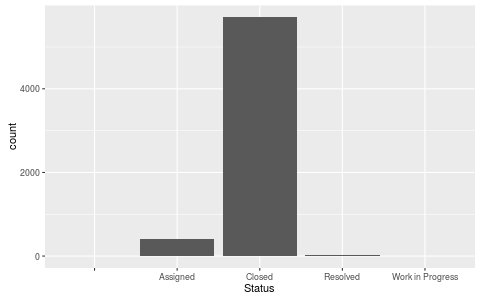

In [14]:
%%R -i dataf -h 300
#The height of the figure is specified with "-h 300"
library(ggplot2)

p = ggplot(dataf) + 
    geom_bar(aes(x=Status))
print(p)

---

### Map:
- column `Status` to visual dimension `x`.
- column `Platform` to visual dimension `y`.

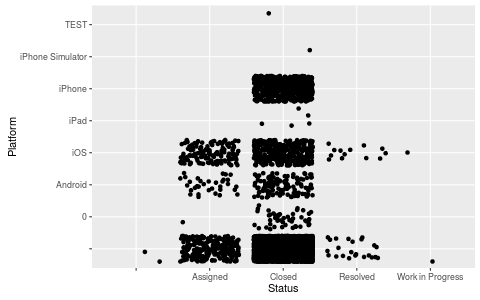

In [15]:
%%R -i dataf -h 300
p = ggplot(dataf) + 
    geom_jitter(aes(x=Status, y=Platform))
print(p)

---

### Map:
- column `Status` to visual dimension `x`.
- column `Platform` to visual dimension `y`.
- column `Action.Type` to visual dimension `color`.

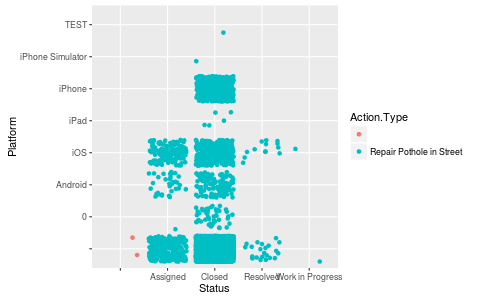

In [16]:
%%R -i dataf -h 300
p = ggplot(dataf) + 
    geom_jitter(aes(x=Status, y=Platform, color=Action.Type))
print(p)

---

## Interlude: namespaces in R

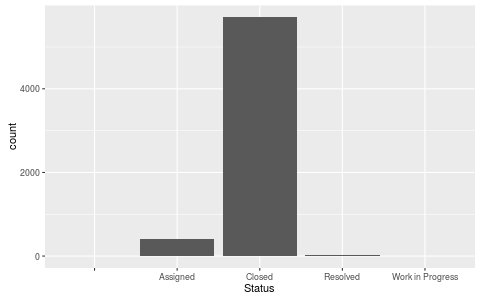

In [17]:
%%R -i dataf -h 300
library(ggplot2)

p = ggplot2::ggplot(dataf) + 
    ggplot2::geom_bar(ggplot2::aes(x=Status))
print(p)

---

## R from Python

In [18]:
%%R
p = ggplot2::ggplot(dataf) + 
    ggplot2::geom_bar(ggplot2::aes(x=Status))

<hr>

In [19]:
from rpy2.robjects.lib import ggplot2
import rpy2.ipython.ggplot as igp

In [20]:
gp = ggplot2
p = (gp.ggplot(dataf) + 
     gp.geom_bar(gp.aes_string(x='Status')))
type(p)

rpy2.robjects.lib.ggplot2.GGPlot

---

In [21]:
from rpy2.ipython.ggplot import display_png
# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
dpi = png_formatter.for_type(ggplot2.GGPlot, display_png)

---

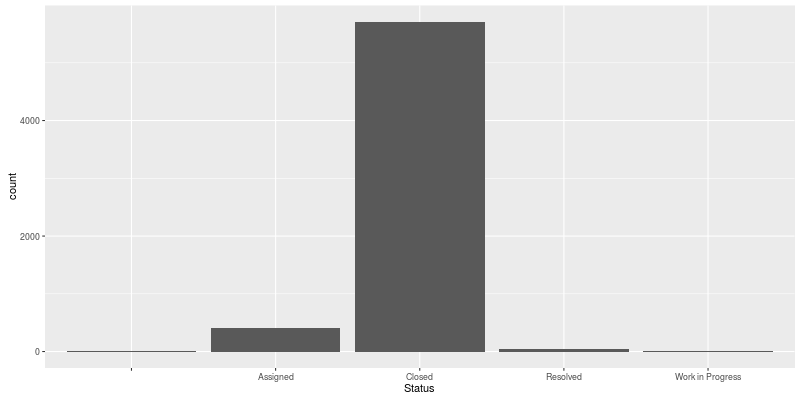

In [22]:
p

---

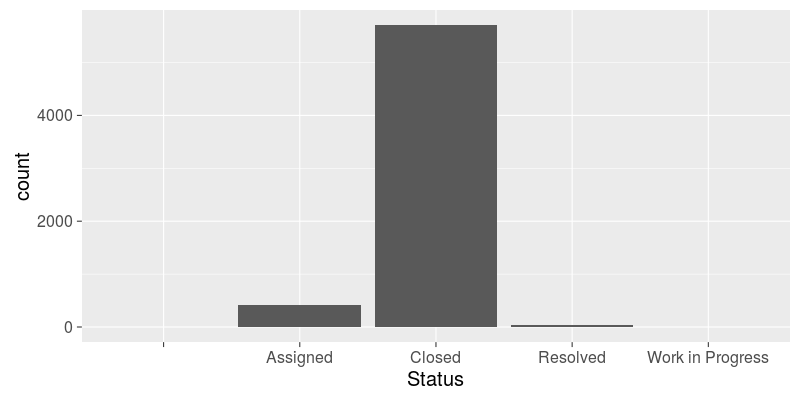

In [23]:
p + gp.theme_gray(base_size=20)

---

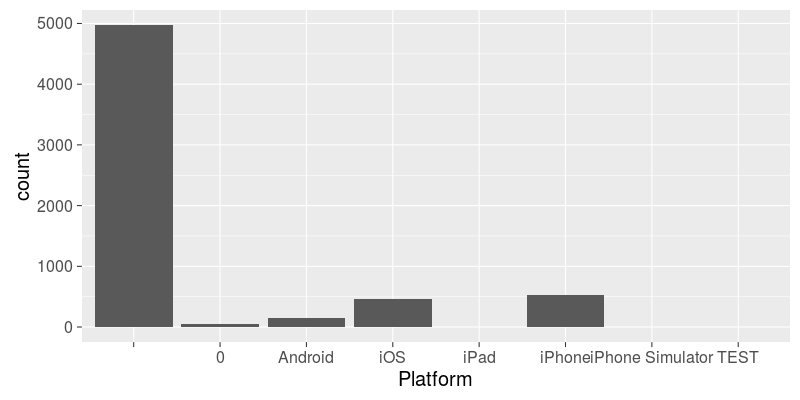

In [24]:
p = (gp.ggplot(dataf) + 
     gp.geom_bar(gp.aes_string(x='Platform')) +
     gp.theme_gray(base_size=20))
p

---

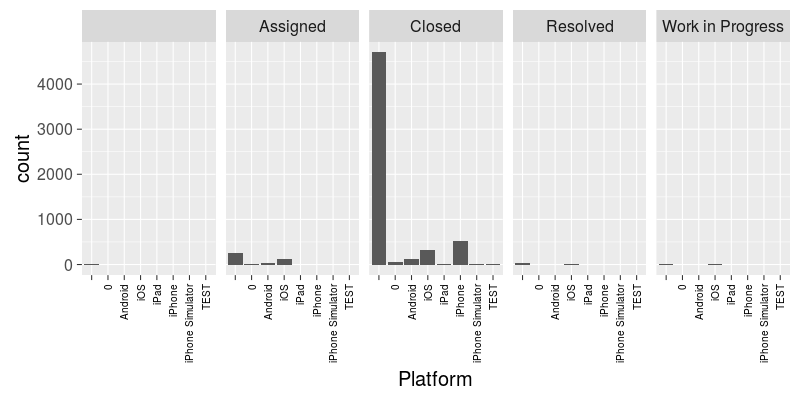

In [25]:
p = (gp.ggplot(dataf) + 
     gp.geom_bar(gp.aes_string(x='Platform')) +
     gp.facet_grid('~Status') +
     gp.theme_gray(base_size=20) +
     gp.theme(**{'axis.text.x': gp.element_text(angle = 90, hjust = 1)}))
p

---

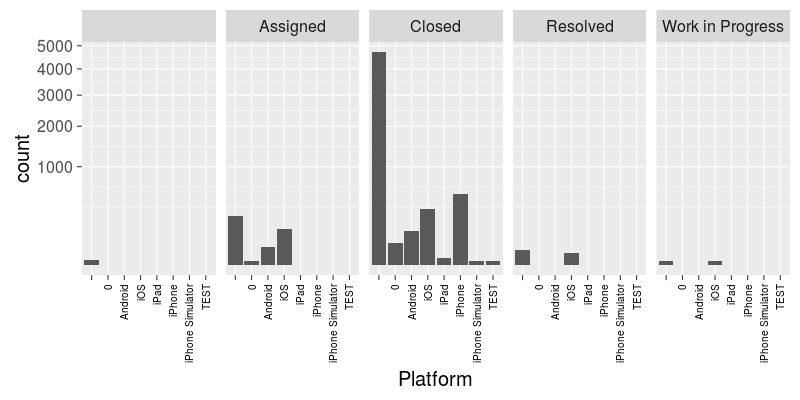

In [26]:
p + gp.scale_y_sqrt()

---

# dplyr

Manipulate data tables with (among others):

<table>
<tbody>
<tr><td><b>mutate</b></td><td>modify/add column</td></tr>
<tr><td><b>filter</b></td><td>filter rows</td></tr>
<tr><td><b>select</b></td><td>select columns</td></tr>
<tr><td><b>group_by</b></td><td>group rows</td></tr>
<tr><td><b>summarize</b></td><td>summarize groups of rows</td></tr>
</tbody>
</table>

---

In [27]:
from rpy2.robjects.lib import dplyr
ddataf = dplyr.DataFrame(dataf)

---

### Strings as R code

In [28]:
ddataf = \
    (ddataf.
     mutate(date_submit='as.POSIXct(Date.Submitted, ' + \
	                '           format="%m/%d/%Y %H:%M:%S")',
            date_complete='as.POSIXct(Date.Completed, ' + \
	                '           format="%m/%d/%Y %H:%M:%S")').
     mutate(days_to_fix='as.numeric(date_complete - date_submit, ' +\
                                    'unit="days")'))

---

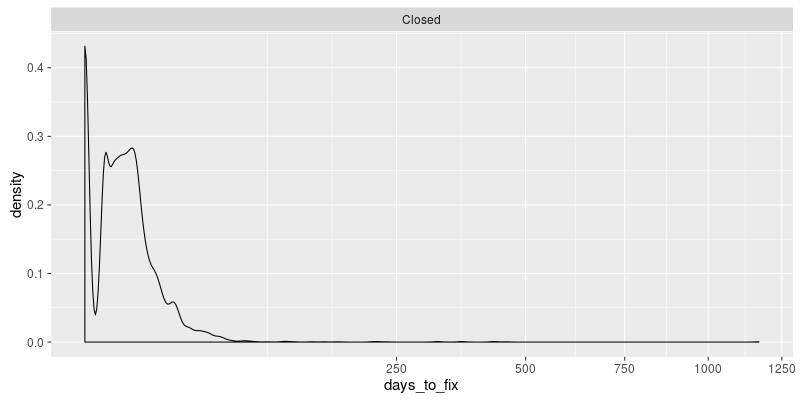

In [29]:
dataf_plot = ddataf.filter('Status == "Closed"')
p = (gp.ggplot(dataf_plot) + 
     gp.geom_density(gp.aes_string(x='days_to_fix')) +
     gp.facet_grid('~Status') +
     gp.scale_x_sqrt() +
     gp.theme_gray(base_size=15) +
     gp.theme(**{'legend.position': 'top'}))
p

---

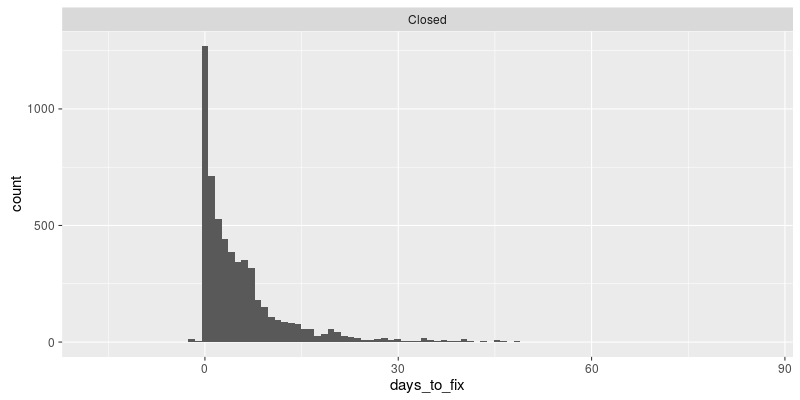

In [30]:
p = (gp.ggplot(ddataf.filter('Status == "Closed"',
                             'days_to_fix < 100')) + 
     gp.geom_histogram(gp.aes_string(x='days_to_fix'), bins=100) +
     gp.facet_grid('~Status') +
     gp.theme_gray(base_size=15) +
     gp.theme(**{'legend.position': 'top'}))
p

---

## Extract coordinates from column "Address"

In [31]:
col_i = ddataf.colnames.index('Address')
first_address = next(ddataf[col_i].iter_labels())
first_address

'Concord Ave\nCambridge, MA\n(42.38675507400046, -71.14068255199965)'

In [32]:
s_pat_float = '[+-]?[0-9.]+'
s_pat_coords = '.+\((%s), (%s)\)$' % (s_pat_float, s_pat_float)
import re
pat_coords = re.compile(s_pat_coords,
                        flags=re.DOTALL)
pat_coords.match(first_address).groups()

('42.38675507400046', '-71.14068255199965')

---

## Final function

In [33]:
from rpy2.robjects import NA_Real
def extract_coords(address):
    m = pat_coords.match(address)
    if m is None:
        return (NA_Real, NA_Real)
    else:
        return tuple(float(x) for x in m.groups())

extract_coords(next(ddataf[col_i].iter_labels()))

(42.38675507400046, -71.14068255199965)

---

## Python and R entwinned

In [34]:
from rpy2.robjects.vectors import FloatVector
from rpy2.robjects import globalenv

globalenv['extract_lat'] = \
    lambda v: FloatVector(tuple(extract_coords(x)[0] for x in v))

globalenv['extract_long'] = \
    lambda v: FloatVector(tuple(extract_coords(x)[1] for x in v))

ddataf = \
    (ddataf.
     mutate(lat='extract_lat(as.character(Address))',
            long='extract_long(as.character(Address))'))

---

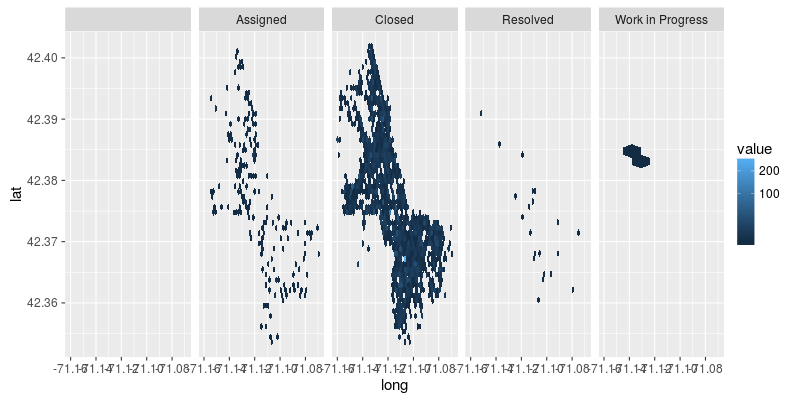

In [35]:
p = (gp.ggplot(ddataf) + 
     gp.geom_hex(gp.aes_string(y='lat', x='long'), bins=50) +
     gp.scale_fill_continuous(trans="sqrt") +
     gp.theme_gray(base_size=15) +
     gp.facet_grid('~Status'))
p

---

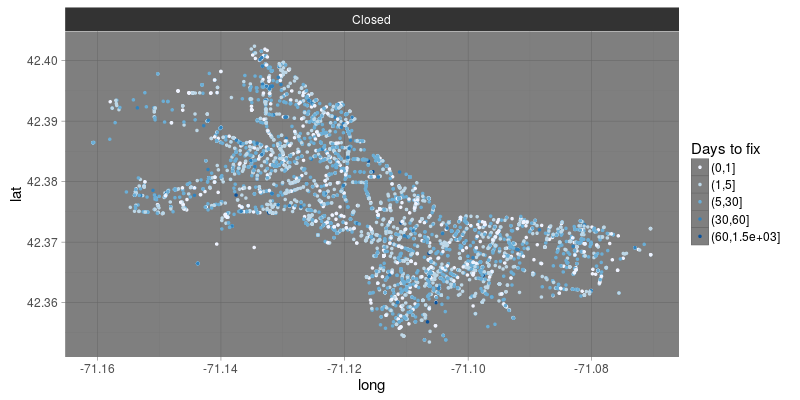

In [36]:
dtf_grp_r = 'cut(days_to_fix, c(0,1,5,30,60,1500))'
p = (gp.ggplot(ddataf.filter('Status == "Closed"')) + 
     gp.geom_point(gp.aes_string(y='lat', x='long',
                                 color=dtf_grp_r),
                  size=1) +
     gp.facet_grid('~Status') +
     gp.theme_dark(base_size=15) +
     gp.scale_color_brewer("Days to fix"))
p

---

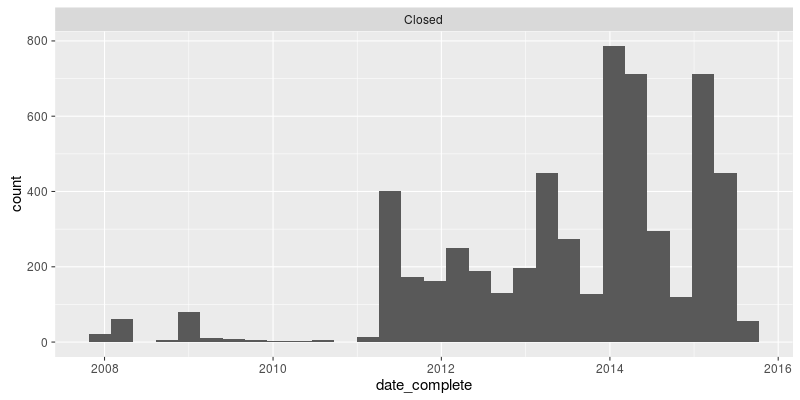

In [37]:
p = (gp.ggplot(ddataf.filter('Status == "Closed"')) + 
     gp.geom_histogram(gp.aes_string(x='date_complete'), bins=30) +
     gp.facet_grid('~Status') +
     gp.theme_gray(base_size=15) +
     gp.theme(**{'legend.position': 'top'}))
p

---

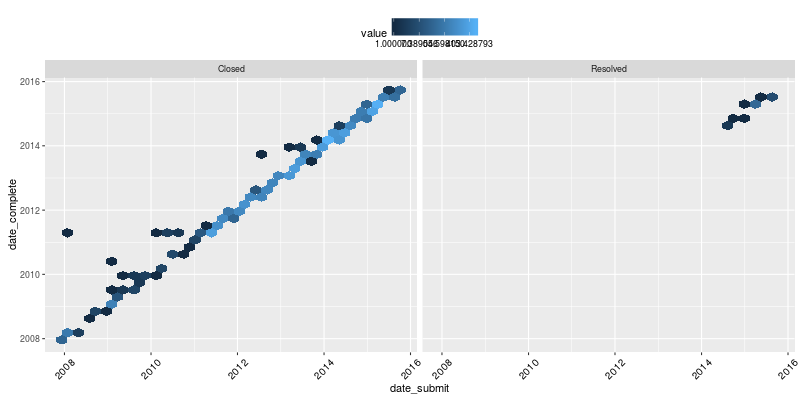

In [38]:
p = (gp.ggplot(ddataf.filter('Status %in% c("Closed", "Resolved")')) + 
     gp.geom_hex(gp.aes_string(x='date_submit', y='date_complete')) +
     gp.facet_grid('~Status') +
     gp.scale_fill_continuous(trans="log") +
     gp.theme(**{'legend.position': 'top',
                 'axis.text.x': gp.element_text(angle=45, hjust=.5)}))
p

---

In [39]:
extract_weekday = """
factor(weekdays(date_submit),
       levels=c("Sunday", "Monday",
                "Tuesday", "Wednesday", "Thursday",
                "Friday", "Saturday"))
"""
# transition iPhone / iOS
ddataf = (ddataf.
          mutate(year_submit='format(date_submit, format="%Y")',
                 month_submit='format(date_submit, format="%m")',
                 weeknum_submit='as.numeric(format(date_submit+3, "%U"))',
                 weekday_submit=(extract_weekday)).
                 filter('year_submit >= 2012',
                 'Platform != ""'))

---

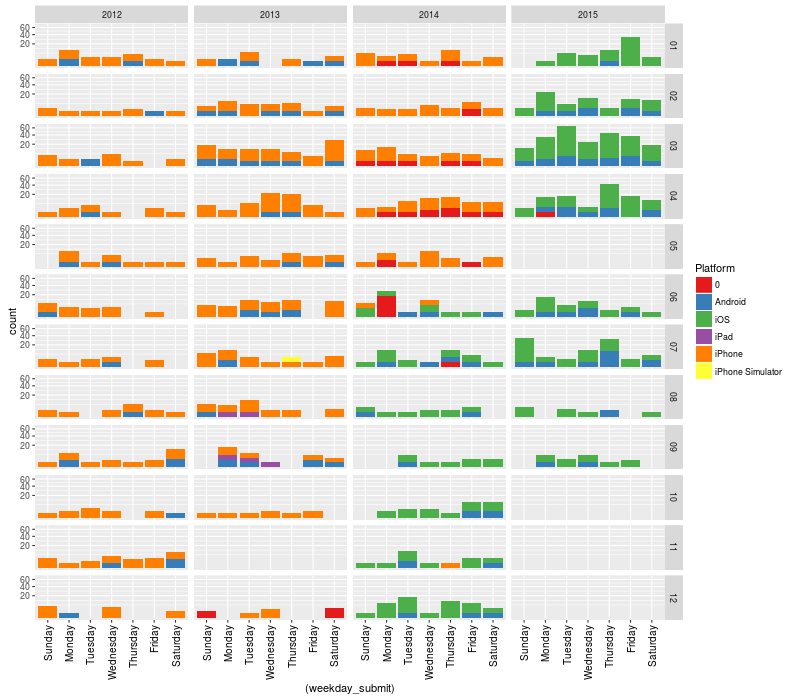

In [40]:
from IPython.core import display
p = (gp.ggplot(ddataf) + 
     gp.geom_bar(gp.aes_string(x='(weekday_submit)', fill='Platform')) +
     gp.scale_fill_brewer(palette = 'Set1') +
     gp.scale_y_sqrt() +
     gp.theme(**{'axis.text.x': gp.element_text(angle = 90, hjust = 1)}) +
     gp.facet_grid('month_submit ~ year_submit'))
display.Image(display_png(p, height=700))

---

In [41]:
by_weekday = ddataf.group_by('weekday_submit')
n_platforms_weekday = (by_weekday.
                       summarise(n='length(unique(Platform))'))
print(n_platforms_weekday)

Source: local data frame [7 x 2]

  weekday_submit     n
          (fctr) (int)
1         Sunday     4
2         Monday     5
3        Tuesday     5
4      Wednesday     5
5       Thursday     5
6         Friday     4
7       Saturday     4

